# Quantum Fourier Transform

- FFT: use it for time domain $f(t)$ to frequency domain $F(\omega)$
- for noise removal
- if $f(t)$ has period $r$, then $F(\omega)$ has period $1/r$

<!--
Sources:
- https://jonathan-hui.medium.com/qc-quantum-fourier-transform-45436f90a43
- https://pennylane.ai/qml/demos/tutorial_qft/
- https://pennylane.ai/qml/demos/tutorial_qft_arithmetics/
- https://pennylane.ai/qml/demos/tutorial_expressivity_fourier_series/
-->

In [46]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from functools import partial

In [37]:
wires = 4
dev = qml.device("default.qubit", wires=wires)

@qml.qnode(dev)
def qft():
    for i in range(wires):
        qml.Hadamard(i)
        angle = np.pi / 2
        for j in range(i+1, wires):
            qml.CRZ(angle, wires=[j, i])
            angle /= 2
    return qml.state()
y_circ = qft()

In [14]:
print(qml.draw(qft)())

0: ──H─╭RZ(1.57)─╭RZ(0.79)─╭RZ(0.39)────────────────────────────────────────┤  State
1: ────╰●────────│─────────│──────────H─╭RZ(1.57)─╭RZ(0.79)─────────────────┤  State
2: ──────────────╰●────────│────────────╰●────────│──────────H─╭RZ(1.57)────┤  State
3: ────────────────────────╰●─────────────────────╰●───────────╰●─────────H─┤  State


In [49]:
# This line is to expand the circuit to see the operators
@partial(qml.devices.preprocess.decompose, stopping_condition = lambda obj: False, max_expansion=1)
def circuit():
    qml.QFT(wires=range(wires))
    return qml.state()
    
print(qml.draw(circuit, expansion_strategy="device")())

0: ──H─╭Rϕ(1.57)─╭Rϕ(0.79)─╭Rϕ(0.39)────────────────────────────────────────╭SWAP───────┤  State
1: ────╰●────────│─────────│──────────H─╭Rϕ(1.57)─╭Rϕ(0.79)─────────────────│─────╭SWAP─┤  State
2: ──────────────╰●────────│────────────╰●────────│──────────H─╭Rϕ(1.57)────│─────╰SWAP─┤  State
3: ────────────────────────╰●─────────────────────╰●───────────╰●─────────H─╰SWAP───────┤  State


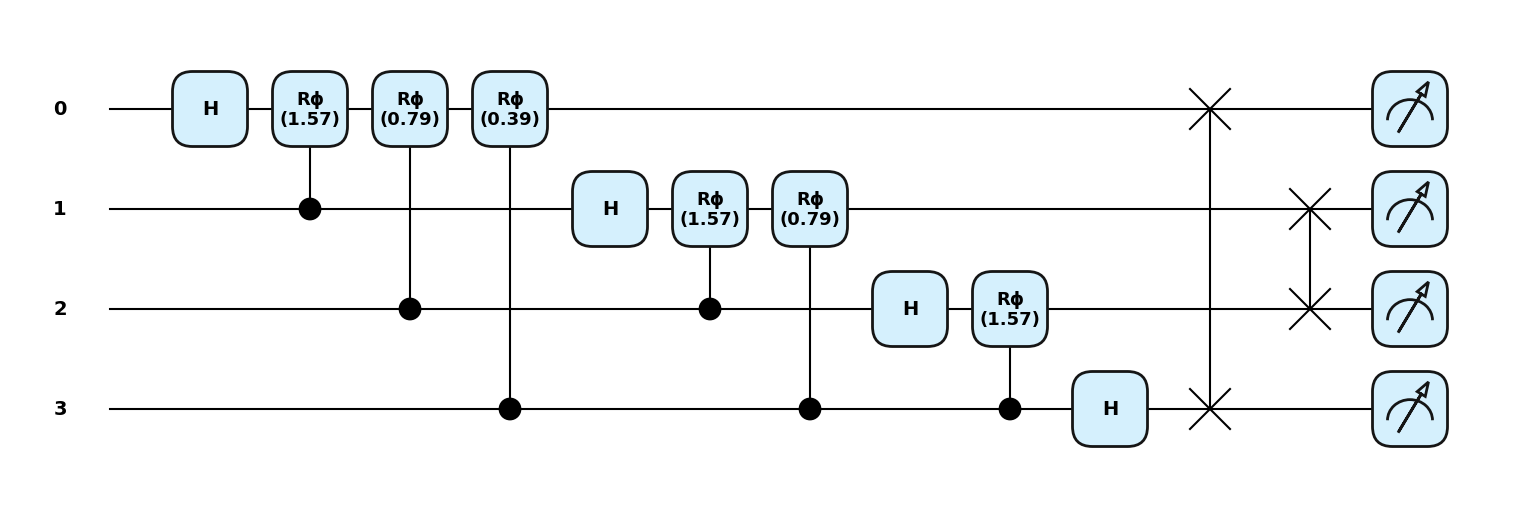

In [51]:
qml.draw_mpl(circuit, decimals=2, style="pennylane")()
plt.show()

In [40]:
qft_matrix = qml.QFT(wires=range(4)).matrix()

In [43]:
err = 1e-10

np.all((qft_matrix[0] - y_circ) < err)

tensor(True, requires_grad=True)